# 머신러닝 과제 2

## 2. CNN를 사용한  MNIST 손글씨 숫자 인식(다중 분류)

(1) MNIST 데이터셋을 로드하고, 처리한다.<br>
(2) 훈련 세트와 테스트 세트로 나눈다.<br>
(3) 데이터 전처리<br>
(4) 모델 구성<br>
<table>
<pre>Sequential
Conv2D
MaxPooling2D(활성화 함수: ReLU)
Conv2D
MaxPooling2D(활성화 함수: ReLU)
Flatten
Dense(활성화 함수: ReLU)
Dense(활성화 함수: softmax)<br></pre>
(5) 모델 학습 과정 설정<br>
<pre>비용함수: categorical_crossentropy
Optimizer: SGD<br></pre>
(6) 모델 학습시키기<br>
<pre>epoch: 30</pre>
(7) 모델 평가
<pre>loss_and_metrics</pre>
(8) 그래프 표출: 훈련에서 비용 함수와 테스트에서 비용함수를 epoch에 대하여 그래프로 나타낸다.<br>
(9) 최종적으로 숫자의 인식률을 표시하고, 오류 인식된 숫자를 그림으로 표시한다.

In [21]:
import numpy as np

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout

<b>(1) MNIST 데이터셋을 로드하고, 처리한다.<br>
(2) 훈련 세트와 테스트 세트로 나눈다.<br>
(3) 데이터 전처리</b>

출력할 이미지의 크기를 설정해줍시다.

In [22]:
width = 28
height = 28

In [23]:
(x_train_old, y_train), (x_test_old, y_test) = mnist.load_data()
x_train = x_train_old.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test_old.reshape(10000, width, height, 1).astype('float32') / 255.0

In [24]:
x_train_old.shape

(60000, 28, 28)

In [25]:
x_train.shape

(60000, 28, 28, 1)

(샘플수, 너비, 높이, 채널 수) 입니다.

In [26]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

훈련세트와 검증세트를 분리해줍니다. 사이킷런에서는 train_test_split으로 그냥 나눌 수 있는데 여기선 일일히 나눠주네요.<br>
지금은 array 분리 이용해서만 데이터를 나누었지만, 다음에 시간이 되면 사이킷런을 이용해보고 싶습니다.

In [27]:
x_val = x_train[50000:]
y_val = y_train[50000:]

In [28]:
x_test.shape

(10000, 28, 28, 1)

In [29]:
x_train = x_train[:50000]
y_train = y_train[:50000]

In [30]:
x_train.shape

(50000, 28, 28, 1)

In [31]:
y_train

array([5, 0, 4, ..., 8, 4, 8], dtype=uint8)

다중클래스분류모델과 맞추기 위한 one-hot encoding 을 해줍니다.<br>
CNN의 마지막 단계에서 출력 함수가 존재할텐데, 그들 각각은 0과 1만 출력할테니<br>
그에 따라 입력 데이터의 LABEL도 0과 1로만 구성되게끔 만들어야 하기 때문입니다!

In [32]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

one-hot encoding 후의 데이터 레이블 모습은 이러합니다.

In [33]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [34]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

<b>(4) 모델 구성<br></b>
Sequential<br>

Conv2D<br>

MaxPooling2D(활성화 함수: ReLU)

Conv2D

MaxPooling2D(활성화 함수: ReLU)

Flatten

Dense(활성화 함수: ReLU)

Dense(활성화 함수: softmax)

In [35]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape= (width, height, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

입력층에 컨벌루션 함수가 있고, 활성화 함수는 relu이고 입력데이터는 높이 28, 너비 28, 채널 수 1이네요. <br>
그리고 컨벌루션레이어의 필터는 3 * 3 * 1 이며 <br>
필터의 수는 32개인 것을 보니... 정말 많이 합성곱 계산을 수행하려나 봅니다! <br>

채널이 뭔가 했는데, 수업들으면서 알게 되었습니다. 색을 나타내는 단위였네요. 채널이 1이면 흑백사진이고, 채널이 3이면 rgb 컬러사진이죠.<br>
maxpooling 층을 통해 데이터를 2 * 2로 대폭 줄여준다음에<br>
flatten층을 통해, 2차원의 데이터를 1차원으로 바꿔준다음 affine 층에 전달해주어야 합니다.<br>
요 affine을 상징하는 층 이름이 keras에선 dense라고 하더고만요.<br>
출력 층 뉴런수를 10개로 만든 것을 보니까 one-hot-encoding을 사용한 이유를 알겠네요.<br>

<b>(5) 모델 학습 과정 설정</b><br>

비용함수: categorical_crossentropy
<br>Optimizer: SGD

<b>(6) 모델 학습시키기</b><br>
epoch: 30


In [36]:
model.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
hist = model.fit(x_train, y_train, epochs=30, batch_size =32, validation_data = (x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 75s 2ms/step - loss: 0.4880 - acc: 0.8504 - val_loss: 0.2092 - val_acc: 0.9357
Epoch 2/30
50000/50000 [==============================] - 75s 2ms/step - loss: 0.1788 - acc: 0.9458 - val_loss: 0.1464 - val_acc: 0.9579
Epoch 3/30
50000/50000 [==============================] - 77s 2ms/step - loss: 0.1260 - acc: 0.9609 - val_loss: 0.1070 - val_acc: 0.9691
Epoch 4/30
50000/50000 [==============================] - 78s 2ms/step - loss: 0.0974 - acc: 0.9708 - val_loss: 0.0953 - val_acc: 0.9725
Epoch 5/30
50000/50000 [==============================] - 80s 2ms/step - loss: 0.0799 - acc: 0.9752 - val_loss: 0.0838 - val_acc: 0.9748
Epoch 6/30
50000/50000 [==============================] - 81s 2ms/step - loss: 0.0685 - acc: 0.9790 - val_loss: 0.1077 - val_acc: 0.9647
Epoch 7/30
50000/50000 [==============================] - 79s 2ms/step - loss: 0.0584 - acc: 0.9820 - val_loss: 0.0727 - val_acc

확실히 이미지 데이터 양이 많아서 그런지, 학습시간이 장난이 없네요..


<b>(8) 그래프 표출: 훈련에서 비용 함수와 테스트에서 비용함수를 epoch에 대하여 그래프로 나타낸다.</b><br>


In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

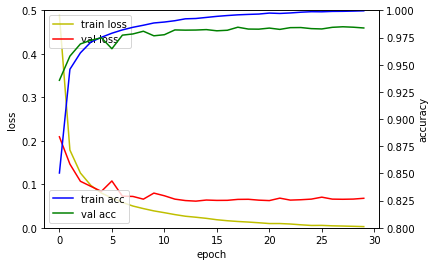

In [41]:

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y',label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r',label = 'val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label = 'train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label = 'val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

train의 정확도는 갈수록 늘고 손실은 줄어드는 반면에 검증셋의 loss는 epoch 15 정도인 지점에서 다시 상승하는 것으로 보아<br>
데이터가 훈련데이터에 <b>과대적합</b>한 것 같습니다. <b>epoch 15 정도에서 학습 멈추는게 좋겠네요!

<b>(7) 모델 평가</b><br>
loss_and_metrics

In [42]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size = 32)
print('## evaluation loss and metrics ##')
print("loss_and_metrics: ", loss_and_metrics)

10000/10000 [==============================] - 4s 430us/step
## evaluation loss and metrics ##
loss_and_metrics:  [0.05571155664049056, 0.9859]


<b>(9) 최종적으로 숫자의 인식률을 표시하고, 오류 인식된 숫자를 그림으로 표시한다.</b>

In [43]:
yhat_test = model.predict(x_test, batch_size = 32)

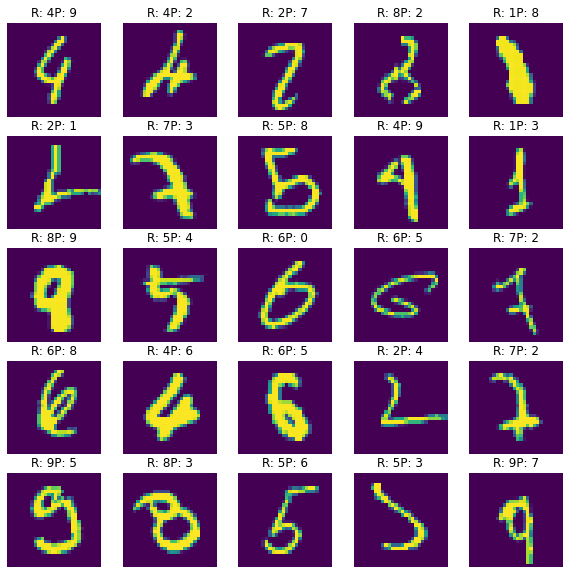

In [44]:
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10, 10)

f,axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
        
    sub_plt = axarr[cnt // plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + 'P: ' +str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)
    
    i +=1
    cnt += 1
    
plt.show()

사람들도 인식하기 어려운 숫자가 많아보입니다. 이 정도면 제가 학습시킨 기계 성능이 꽤나 좋다는 걸 알 수 있네요.